In [1]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Load the balanced dataset
balanced_df = pd.read_csv('fruit.csv')

In [3]:
balanced_df['label'].unique()

array(['Almond', 'Apple', 'Apricot', 'Avocado', 'Beans', 'Beetroot',
       'Bitter Melon', 'Bottle Gourd', 'Brinjal (Eggplant)', 'Broccoli',
       'Buckwheat', 'Cabbage', 'Capsicum (Bell Pepper)', 'Cardamom',
       'Carrot', 'Cashew', 'Cauliflower', 'Chayote', 'Chestnut',
       'Chia Seed', 'Chillies', 'Cinnamon', 'Clove', 'Coconut', 'Coffee',
       'Corn (Maize)', 'Cotton', 'Cranberries', 'Currants',
       'Custard Apple', 'Date Palm', 'Dragon Fruit', 'Elderberries',
       'Fenugreek (Methi)', 'Ginger', 'Goji Berries', 'Grapes', 'Guava',
       'Hazelnut', 'Hemp', 'Jackfruit', 'Java Plum',
       'Jujube (Chinese Date)', 'Jute', 'Kiwi', 'Kiwifruit', 'Lemons',
       'Lettuce', 'Limes', 'Loquat', 'Lychee', 'Mango', 'Medlar',
       'Millet', 'Moringa (Sitalchini)', 'Mountain Apple (Rose Apple)',
       'Oats', 'Okra', 'Olive', 'Onion', 'Orange', 'Papaya',
       'Passion Fruit', 'Peaches', 'Peanut', 'Peas', 'Pineapple', 'Plums',
       'Pomegranate', 'Pomegranates', 'Potato', 'P

In [4]:
# Feature scaling
scaler = StandardScaler()
features = balanced_df.drop('label', axis=1)
target = balanced_df['label']
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)


In [5]:
# Splitting the data into train, validation, and test sets
# Splitting the data into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(scaled_df, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
import joblib


Epoch 1: Training Accuracy: 0.17896389324960754, Validation Accuracy: 0.17399267399267399, Testing Accuracy: 0.18315018315018314
Epoch 2: Training Accuracy: 0.3566718995290424, Validation Accuracy: 0.3326007326007326, Testing Accuracy: 0.3336996336996337
Epoch 3: Training Accuracy: 0.4010204081632653, Validation Accuracy: 0.37032967032967035, Testing Accuracy: 0.36227106227106226
Epoch 4: Training Accuracy: 0.42441130298273155, Validation Accuracy: 0.39304029304029303, Testing Accuracy: 0.3904761904761905
Epoch 5: Training Accuracy: 0.4382260596546311, Validation Accuracy: 0.4076923076923077, Testing Accuracy: 0.40476190476190477
Epoch 6: Training Accuracy: 0.4491365777080063, Validation Accuracy: 0.42637362637362636, Testing Accuracy: 0.41501831501831504
Epoch 7: Training Accuracy: 0.4597331240188383, Validation Accuracy: 0.43553113553113554, Testing Accuracy: 0.42417582417582417
Epoch 8: Training Accuracy: 0.4706436420722135, Validation Accuracy: 0.44065934065934065, Testing Accuracy

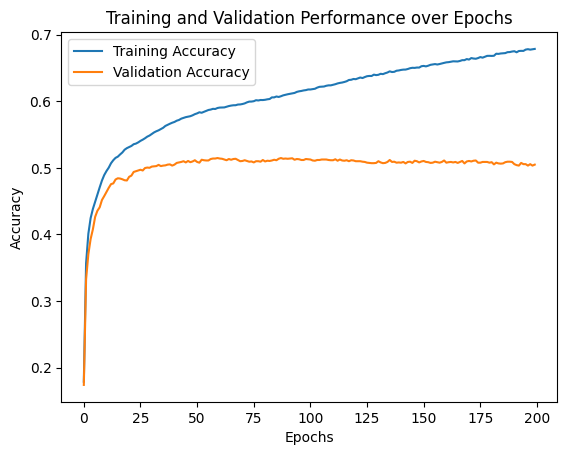

MLP Training Accuracy:  0.6784929356357928
MLP Accuracy on Validation Set:  0.5047619047619047


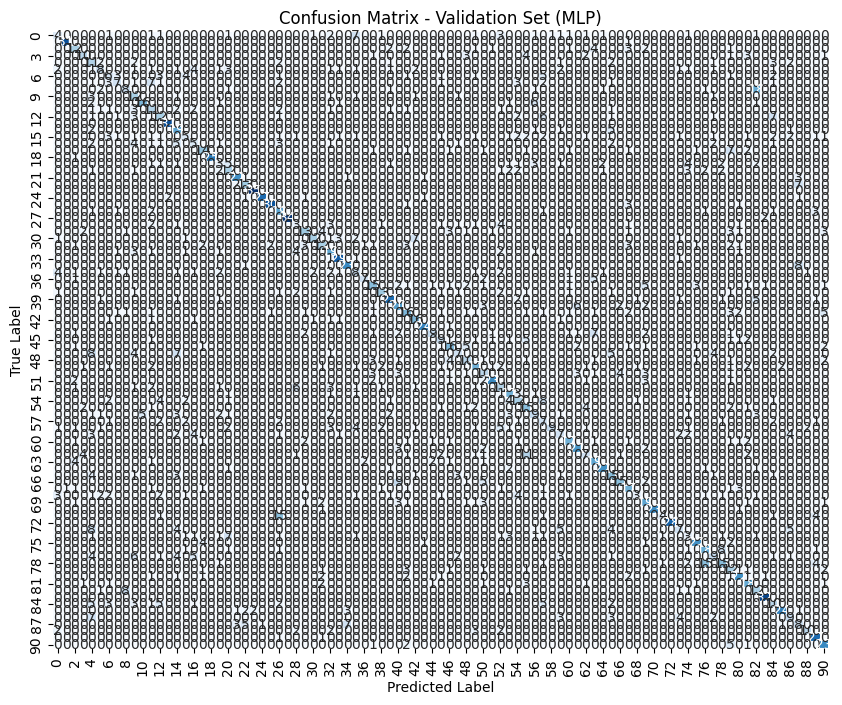

MLP Accuracy on Test Set:  0.4937728937728938


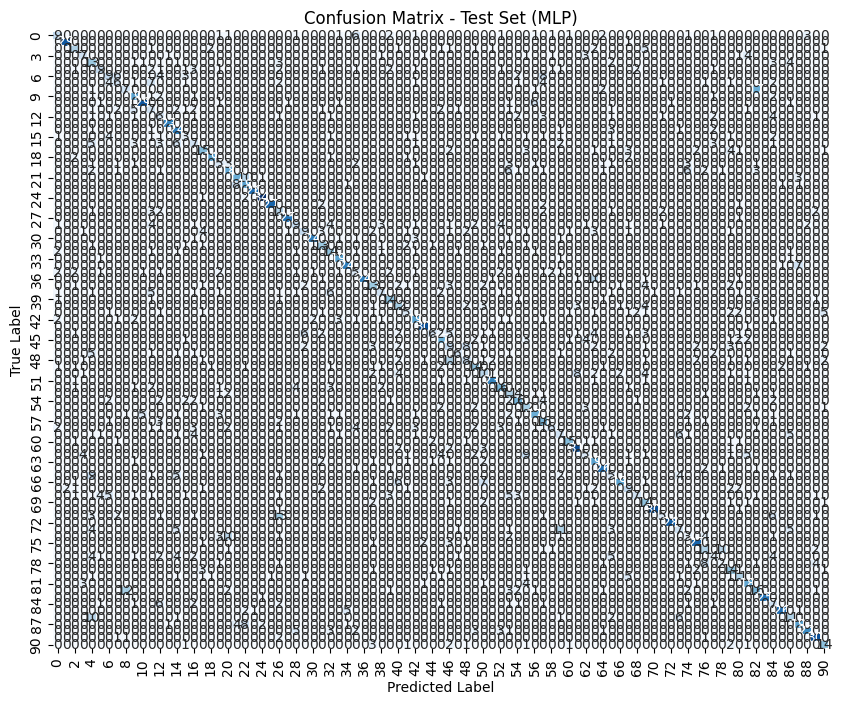

In [12]:
from sklearn.neural_network import MLPClassifier

# Define the MLP model
MLP = MLPClassifier(hidden_layer_sizes=(150, 45, 100), activation='relu', solver='adam', random_state=0)

# Initialize lists to store training, validation, and testing accuracies
training_accuracies = []
validation_accuracies = []
testing_accuracies = []

# Train the MLP model and keep track of training, validation, and testing accuracies
for epoch in range(1, MLP.max_iter + 1):  # Use max_iter attribute of MLPClassifier
    MLP.partial_fit(X_train, y_train, classes=np.unique(y_train))
    training_accuracy = MLP.score(X_train, y_train)
    validation_accuracy = MLP.score(X_val, y_val)
    testing_accuracy = MLP.score(X_test, y_test)
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)
    testing_accuracies.append(testing_accuracy)
    print(f"Epoch {epoch}: Training Accuracy: {training_accuracy}, Validation Accuracy: {validation_accuracy}, Testing Accuracy: {testing_accuracy}")

# Plotting training and validation accuracy over epochs
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Performance over Epochs')
plt.legend()
plt.show()

# Calculate final training accuracy
training_accuracy_mlp = training_accuracies[-1]
print("MLP Training Accuracy: ", training_accuracy_mlp)

# Calculate and print final validation accuracy
accuracy_val_mlp = validation_accuracies[-1]
print("MLP Accuracy on Validation Set: ", accuracy_val_mlp)

# Confusion Matrix for validation set
predicted_values_val_mlp = MLP.predict(X_val)
cm_val_mlp = confusion_matrix(y_val, predicted_values_val_mlp)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_val_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Validation Set (MLP)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate and print final testing accuracy
mlp_accuracy=accuracy_test_mlp = testing_accuracies[-1]
print("MLP Accuracy on Test Set: ", accuracy_test_mlp)

# Confusion Matrix for test set
predicted_values_test_mlp = MLP.predict(X_test)
cm_test_mlp = confusion_matrix(y_test, predicted_values_test_mlp)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set (MLP)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the trained MLP model
filename_mlp = 'mlp_model.pkl'
with open(filename_mlp, 'wb') as file:
    joblib.dump(MLP, file)


Random Forest Training Accuracy:  0.4978021978021978
Random Forest Accuracy on Validation Set:  0.4472527472527473


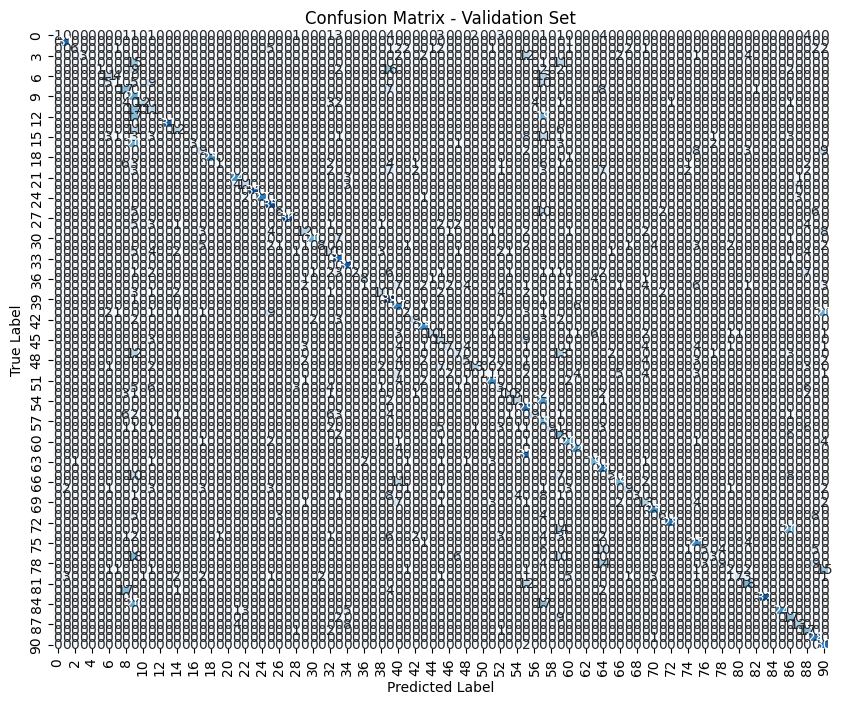

Random Forest Accuracy on Test Set:  0.45567765567765567


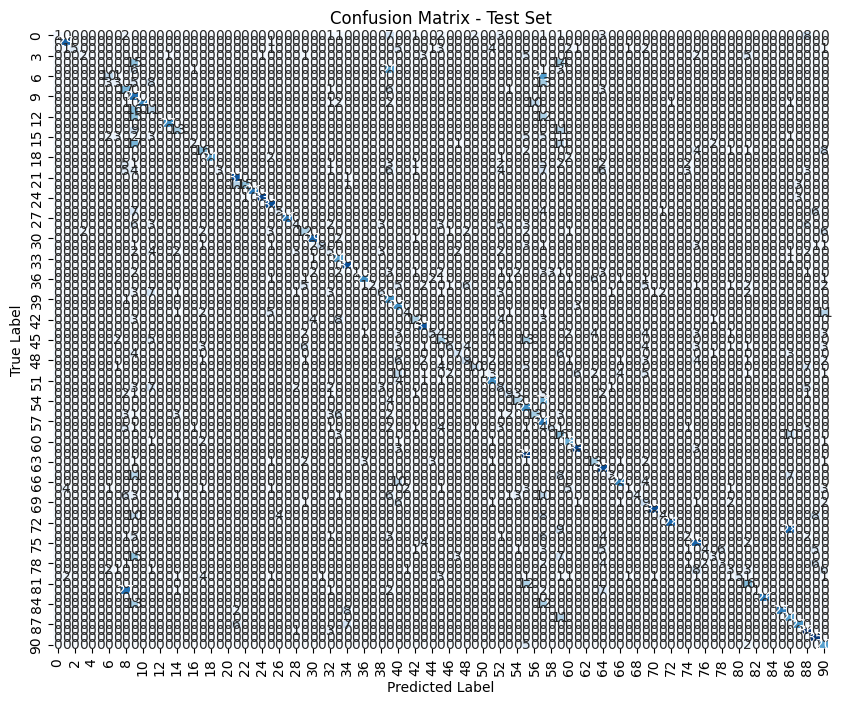

In [8]:
from sklearn.ensemble import RandomForestClassifier
# Training the Random Forest Classifier
RF = RandomForestClassifier(
    criterion='gini',
    max_depth=7,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=1000,  # Number of trees in the forest
    random_state=0)
RF.fit(X_train, y_train)

# Calculate training accuracy
training_accuracy = RF.score(X_train, y_train)
print("Random Forest Training Accuracy: ", training_accuracy)

# Predicting on the validation set
predicted_values_val = RF.predict(X_val)

# Calculating accuracy on validation set
accuracy_val = accuracy_score(y_val, predicted_values_val)
print("Random Forest Accuracy on Validation Set: ", accuracy_val)

# Confusion Matrix for validation set
cm_val = confusion_matrix(y_val, predicted_values_val)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Predicting on the test set
predicted_values_test = RF.predict(X_test)

# Calculating accuracy on test set
rf_accuracy=accuracy_test = accuracy_score(y_test, predicted_values_test)
print("Random Forest Accuracy on Test Set: ", accuracy_test)

# Confusion Matrix for test set
cm_test = confusion_matrix(y_test, predicted_values_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the trained model
filename = 'rf_model.pkl'
with open(filename, 'wb') as file:
    joblib.dump(RF, file)

Random Forest Training Accuracy:  0.7695852534562212
Random Forest Accuracy on Validation Set:  0.6612903225806451


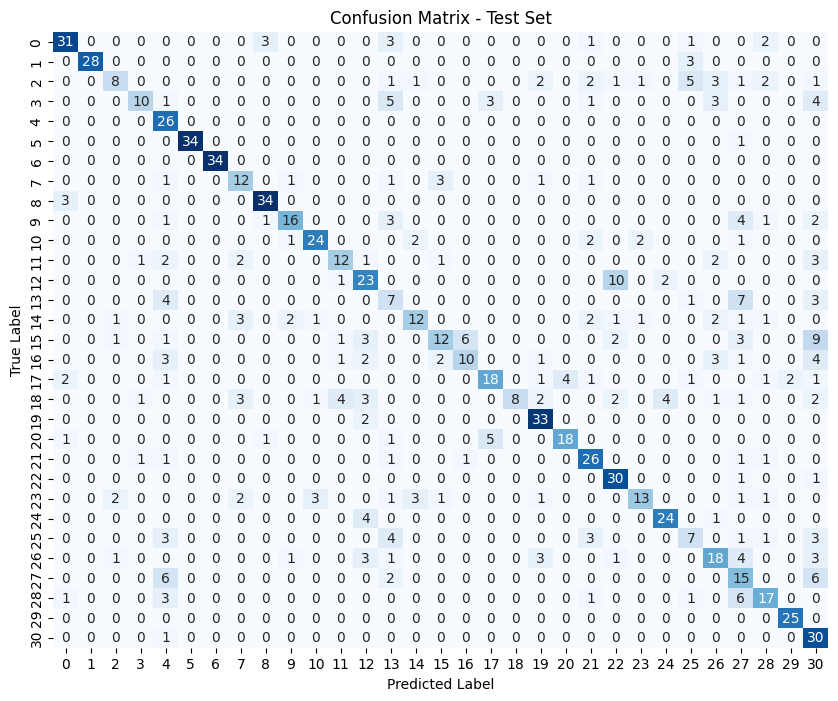

Random Forest Accuracy on Test Set:  0.6634408602150538


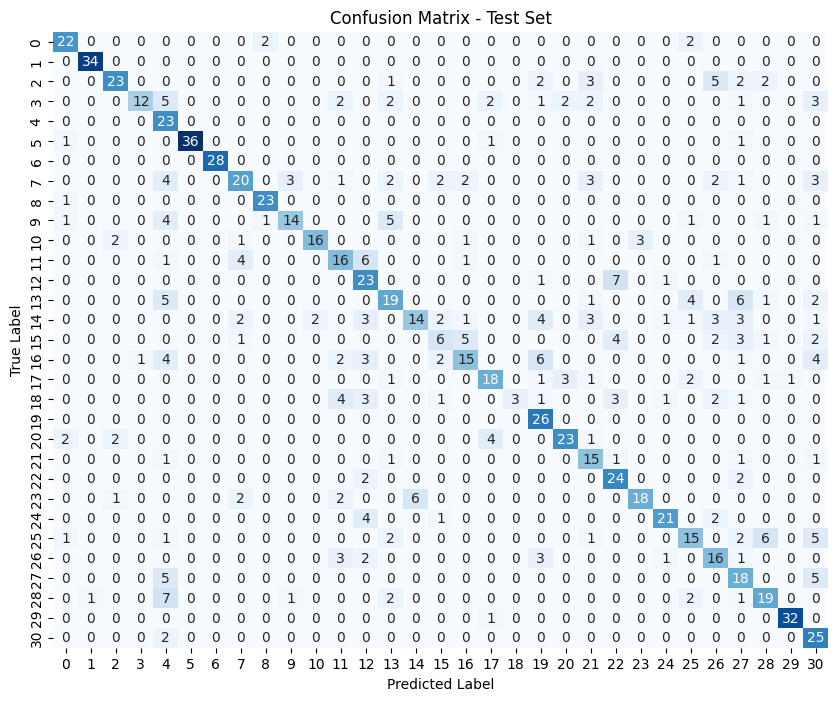

Best Parameters where the model achieved the best score:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Score: 0.6555299539170507


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 7, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 5],
    'min_samples_split': [2, 3, 5]
}

# Create a Random Forest Classifier
RF = RandomForestClassifier(random_state=0)

# Perform GridSearchCV with cross-validation on the training set
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Calculate training accuracy
training_accuracy = best_rf.score(X_train, y_train)
print("Random Forest Training Accuracy: ", training_accuracy)

# Evaluate the best model on the validation set
predicted_values_val = best_rf.predict(X_val)
accuracy_val = accuracy_score(y_val, predicted_values_val)
print("Random Forest Accuracy on Validation Set: ", accuracy_val)

# Confusion Matrix for validation set
cm_test = confusion_matrix(y_val, predicted_values_val)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the best model on the test set
predicted_values_test = best_rf.predict(X_test)
RF_accuracy=accuracy_test = accuracy_score(y_test, predicted_values_test)
print("Random Forest Accuracy on Test Set: ", accuracy_test)

# Confusion Matrix for test set
cm_test = confusion_matrix(y_test, predicted_values_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the best trained Random Forest model
filename = 'best_rf_model.pkl'
with open(filename, 'wb') as file:
    joblib.dump(best_rf, file)

# Get the best parameters where the model achieved the best score
best_params_rf = grid_search.best_params_
best_score_rf = grid_search.best_score_

print("Best Parameters where the model achieved the best score:")
print(best_params_rf)
print("Best Score:", best_score_rf)

Decision Tree Training Accuracy:  0.7769585253456222
Decision Tree Accuracy on Validation Set:  0.5752688172043011


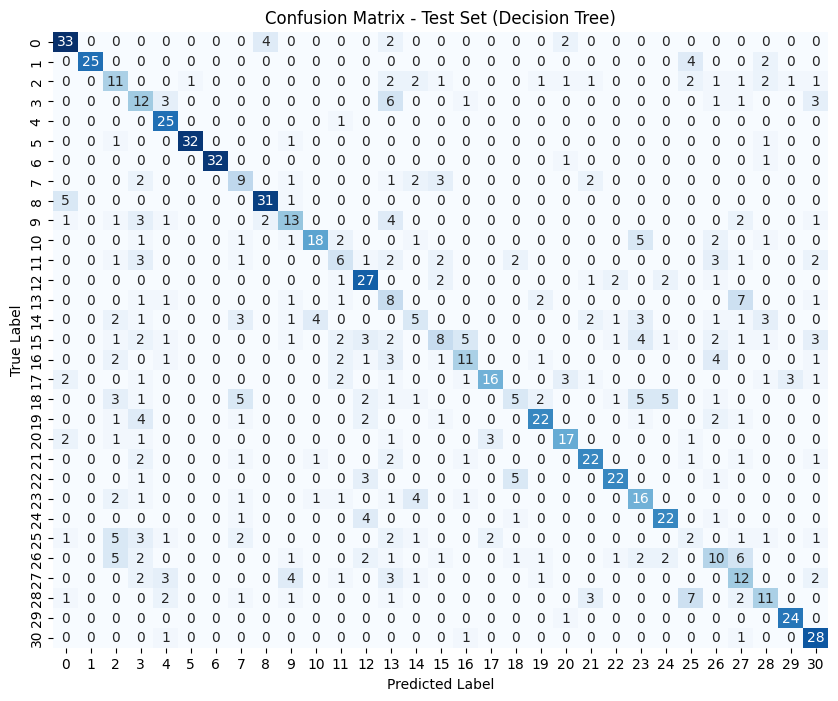

Decision Tree Accuracy on Test Set:  0.567741935483871


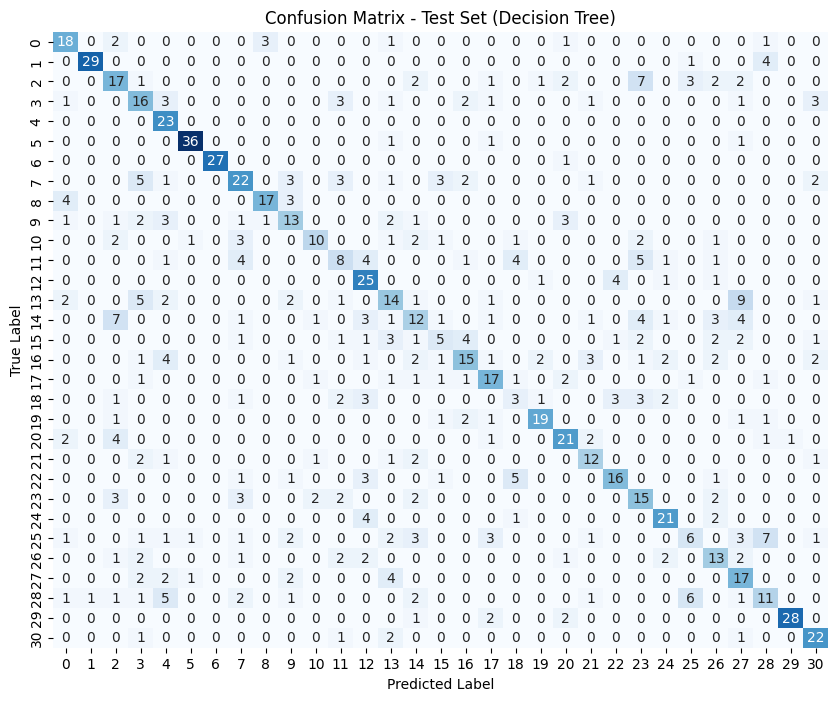

Best Parameters where the model achieved the best score:
{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 2, 'splitter': 'best'}
Best Score: 0.5423963133640554


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Parameters for Decision Tree Classifier (Expanded range for exploration)
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 3, 4, 5],  # Expanded range
    'min_samples_leaf': [1, 2, 3, 5],  # Expanded range
    'max_features': ['sqrt', 'log2', None],  # Expanded options
    'ccp_alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5],
    'max_depth': [10, 15, 20, 25, 30],  # Expanded range
    'random_state': [2]
}

# Create a Decision Tree Classifier
DT = DecisionTreeClassifier()

# Perform GridSearchCV with cross-validation on the training set
grid_search = GridSearchCV(estimator=DT, param_grid=dt_params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_dt = grid_search.best_params_
best_dt = grid_search.best_estimator_

# Print training accuracy
accuracy_train_dt = best_dt.score(X_train, y_train)
print("Decision Tree Training Accuracy: ", accuracy_train_dt)

# Evaluate the best model on the validation set
predicted_values_val_dt = best_dt.predict(X_val)
accuracy_val_dt = accuracy_score(y_val, predicted_values_val_dt)
print("Decision Tree Accuracy on Validation Set: ", accuracy_val_dt)

# Confusion Matrix for validation set
cm_test_dt = confusion_matrix(y_val, predicted_values_val_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set (Decision Tree)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the best model on the test set
predicted_values_test_dt = best_dt.predict(X_test)
dt_accuracy=accuracy_test_dt = accuracy_score(y_test, predicted_values_test_dt)
print("Decision Tree Accuracy on Test Set: ", accuracy_test_dt)

# Confusion Matrix for test set
cm_test_dt = confusion_matrix(y_test, predicted_values_test_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set (Decision Tree)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Get the best parameters where the model achieved the best score
best_params_dt = grid_search.best_params_
best_score_dt = grid_search.best_score_

print("Best Parameters where the model achieved the best score:")
print(best_params_dt)
print("Best Score:", best_score_dt)

# Save the best trained Decision Tree model
filename_dt = 'best_dt_model.pkl'
with open(filename_dt, 'wb') as file_dt:
    joblib.dump(best_dt, file_dt)


C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.P

SVM Training Accuracy:  0.6569124423963134
SVM Accuracy on Validation Set:  0.5946236559139785


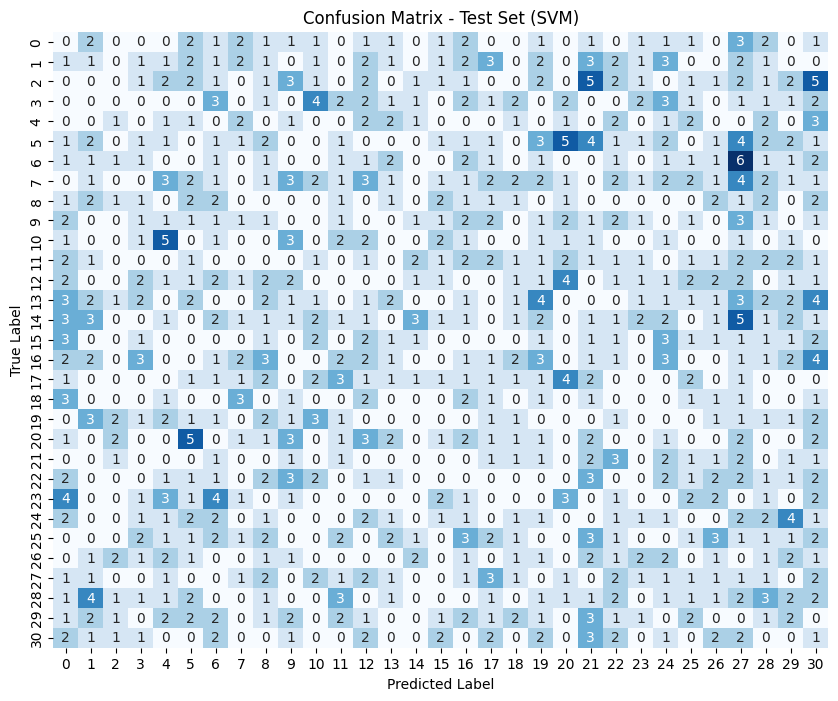

SVM Accuracy on Test Set:  0.6086021505376344


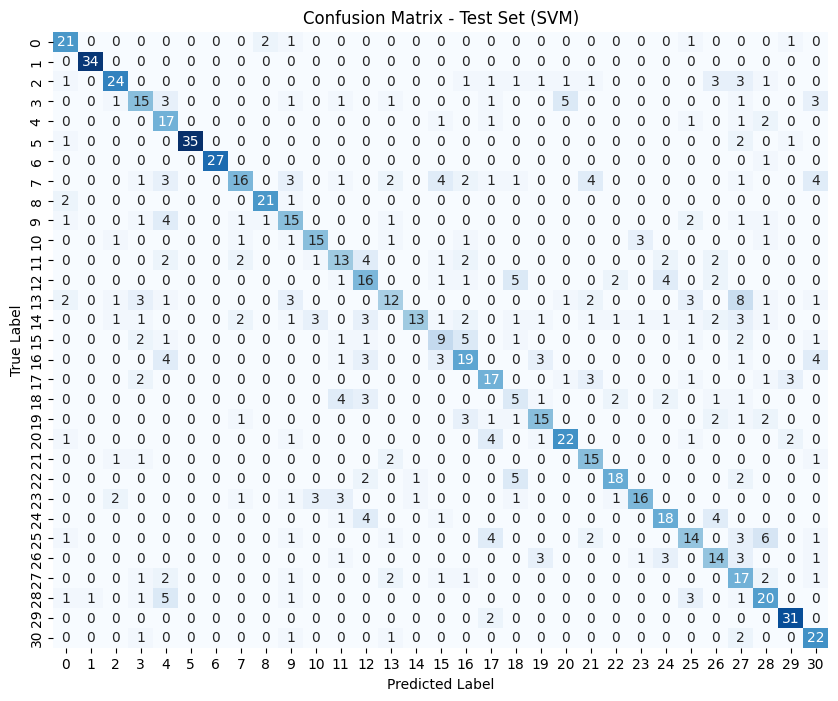

Best Parameters where the SVM model achieved the best score:
{'C': 1.0, 'kernel': 'rbf', 'max_iter': 139, 'tol': 0.025}
Best Score for SVM: 0.5993087557603686


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Parameters for SVM
svm_params = {
    'C': [0.25, 0.50, 0.75, 1.0],
    'tol': [1e-10, 1e-5, 1e-4, 0.025, 0.50, 0.75],
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
    'max_iter': [int(x) for x in np.linspace(start=1, stop=250, num=10)]
}

# Create an SVM Classifier
svm = SVC()

# Perform GridSearchCV with cross-validation on the training set
grid_search_svm = GridSearchCV(estimator=svm, param_grid=svm_params, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and best estimator for SVM
best_params_svm = grid_search_svm.best_params_
best_svm = grid_search_svm.best_estimator_

# Print training accuracy for SVM
accuracy_train_svm = best_svm.score(X_train, y_train)
print("SVM Training Accuracy: ", accuracy_train_svm)

# Evaluate the best model on the validation set
predicted_values_val_svm = best_svm.predict(X_val)
accuracy_val_svm = accuracy_score(y_val, predicted_values_val_svm)
print("SVM Accuracy on Validation Set: ", accuracy_val_svm)

# Confusion Matrix for Validation set
cm_test_svm = confusion_matrix(y_test, predicted_values_val_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set (SVM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the best model on the test set
predicted_values_test_svm = best_svm.predict(X_test)
svm_accuracy=accuracy_test_svm = accuracy_score(y_test, predicted_values_test_svm)
print("SVM Accuracy on Test Set: ", accuracy_test_svm)

# Confusion Matrix for test set
cm_test_svm = confusion_matrix(y_test, predicted_values_test_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test Set (SVM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Get the best parameters where the SVM model achieved the best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters where the SVM model achieved the best score:")
print(best_params_svm)
print("Best Score for SVM:", best_score_svm)

# Save the best trained SVM model
filename_svm = 'best_svm_model.pkl'
with open(filename_svm, 'wb') as file_svm:
    joblib.dump(best_svm, file_svm)


MLP Accuracy: 0.6096774193548387
Random Forest Accuracy: 0.6096774193548387
RF Accuracy: 0.6634408602150538
Decision Tree Accuracy: 0.567741935483871
SVM Accuracy: 0.6086021505376344


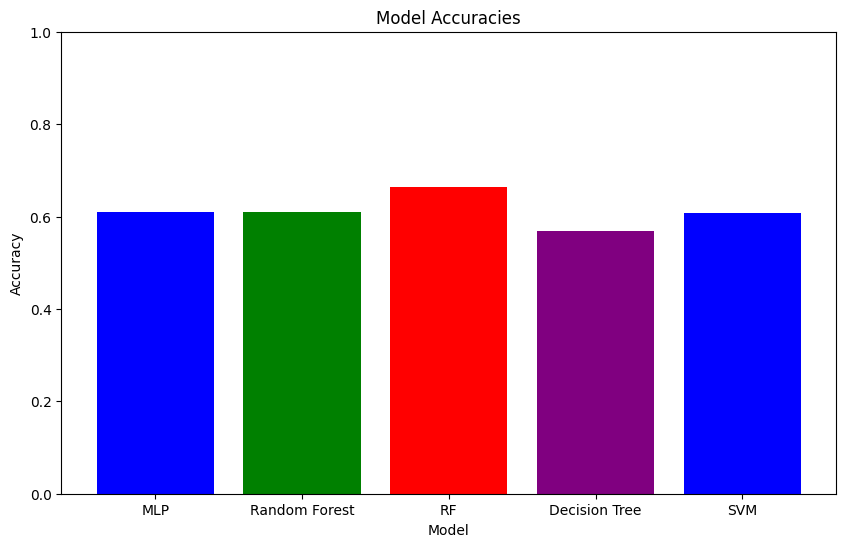

In [ ]:
# Define the accuracies and model names
model_accuracies = [mlp_accuracy, rf_accuracy, RF_accuracy, dt_accuracy, svm_accuracy]
model_names = ["MLP", "Random Forest","RF", "Decision Tree", "SVM"]

# Print accuracies
for model_name, accuracy in zip(model_names, model_accuracies):
    print(f"{model_name} Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy ranges from 0 to 1
plt.show()

In [ ]:
# Determine the best model based on accuracy
best_model = max([("MLP", mlp_accuracy), ("Random Forest", rf_accuracy), ("RF",RF_accuracy), ("Decision Tree", dt_accuracy), ("svm", svm_accuracy)],key=lambda x: x[1])

print("Best Model:", best_model[0])
print("Accuracy:", best_model[1])

# Save the best model
if best_model[0] == "MLP":
    filename = 'mlp_model.pkl'
    best_model_instance = MLP
elif best_model[0] == "Random Forest":
    filename = 'rf_model.pkl'
elif best_model[0] == "RF":
    filename = 'best_rf_model.pkl'
    best_model_instance = RF
elif best_model[0] == "Decision Tree":
    filename = 'best_dt_model.pkl'
    best_model_instance = DT
elif best_model[0] == "svm":
    filename = 'best_svm_model.pkl'
    best_model_instance = svm

with open(filename, 'wb') as file:
    joblib.dump(best_model_instance, file)

# Load the best model
with open(filename, 'rb') as file:
    best_model_loaded = joblib.load(file)

Best Model: RF
Accuracy: 0.6634408602150538


MLP Accuracy: 0.6096774193548387
Random Forest Accuracy: 0.6096774193548387
RF Accuracy: 0.6634408602150538
Decision Tree Accuracy: 0.567741935483871
SVM Accuracy: 0.6086021505376344


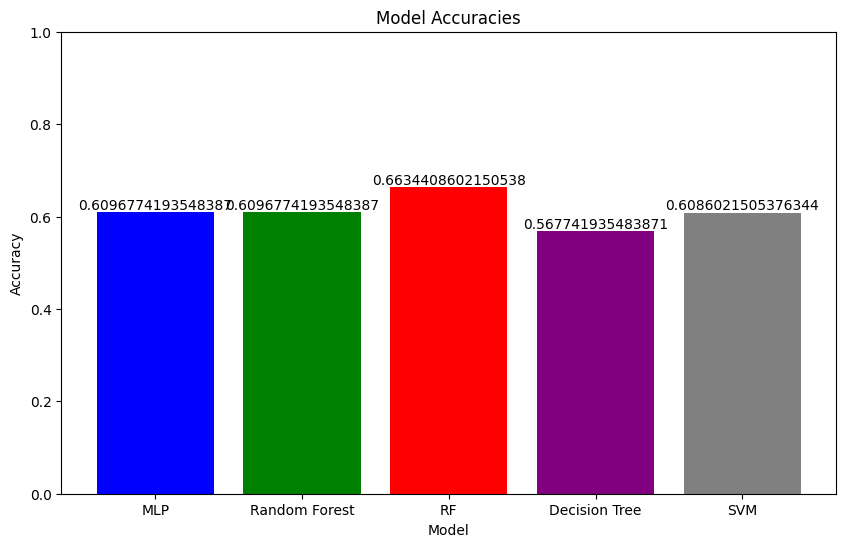

In [ ]:
import matplotlib.pyplot as plt

# Define the accuracies and model names
model_accuracies = [mlp_accuracy, rf_accuracy, RF_accuracy,dt_accuracy, svm_accuracy]
model_names = ["MLP", "Random Forest", "RF", "Decision Tree", "SVM"]

# Print accuracies
for model_name, accuracy in zip(model_names, model_accuracies):
    print(f"{model_name} Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, model_accuracies, color=['blue', 'green', 'red', 'purple','gray'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy ranges from 0 to 1

# Adding text on top of each bar
for bar, accuracy in zip(bars, model_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{accuracy}", ha='center', va='bottom')

plt.show()
